# **Session별 데이터 취합**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
path = 'E:/2022년/PSAT/주제분석/KEMDy20'
os.chdir(path)

## **1. 파일 목록 생성**

In [3]:
def search(dirname):
    result = []
    filenames = os.listdir(dirname)
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        result.append(full_filename)
        print(full_filename)
    
    return result

In [4]:
ann = os.path.join(path, 'annotation')

In [5]:
# 전체 txt, wav 모으기

files = os.listdir(ann)

filescnt_wav = [i for i in files if i.endswith('.csv')]
print(filescnt_wav)

['Sess01_eval.csv', 'Sess02_eval.csv', 'Sess03_eval.csv', 'Sess04_eval.csv', 'Sess05_eval.csv', 'Sess06_eval.csv', 'Sess07_eval.csv', 'Sess08_eval.csv', 'Sess09_eval.csv', 'Sess10_eval.csv', 'Sess11_eval.csv', 'Sess12_eval.csv', 'Sess13_eval.csv', 'Sess14_eval.csv', 'Sess15_eval.csv', 'Sess16_eval.csv', 'Sess17_eval.csv', 'Sess18_eval.csv', 'Sess19_eval.csv', 'Sess20_eval.csv', 'Sess21_eval.csv', 'Sess22_eval.csv', 'Sess23_eval.csv', 'Sess24_eval.csv', 'Sess25_eval.csv', 'Sess26_eval.csv', 'Sess27_eval.csv', 'Sess28_eval.csv', 'Sess29_eval.csv', 'Sess30_eval.csv', 'Sess31_eval.csv', 'Sess32_eval.csv', 'Sess33_eval.csv', 'Sess34_eval.csv', 'Sess35_eval.csv', 'Sess36_eval.csv', 'Sess37_eval.csv', 'Sess38_eval.csv', 'Sess39_eval.csv', 'Sess40_eval.csv']


In [6]:
df_all = pd.DataFrame()

for i in range(0, len(filescnt_wav)) :
    file = filescnt_wav[i]
    df = pd.read_csv(os.path.join(ann, file), encoding = 'utf-8')
    df['filename'] = file.split('_eval')[0]
    df_all = pd.concat([df_all, df])

sess_df = df_all.drop([0],axis = 0)
sess_df.head()

,Numb,WAV,,Segment ID,Total Evaluation,.1,.2,Eval01F,.3,.4,...,Eval08M,.17,.18,Eval09F,.19,.20,Eval10M,.21,.22,filename
1,1,3.5783901,11.637391,Sess01_script01_User002M_001,neutral,3.4,2.9,neutral,3,3,...,neutral,4,3,neutral,3,3,neutral,3,3,Sess01
2,2,11.637391,23.334393,Sess01_script01_User002M_002,neutral,3.1,2.9,neutral,3,3,...,neutral,4,3,neutral,3,3,neutral,3,3,Sess01
3,3,23.334393,31.558392,Sess01_script01_User002M_003,neutral,3.1,3,neutral,3,3,...,neutral,4,3,neutral,3,3,neutral,3,3,Sess01
4,4,31.558392,42.97039,Sess01_script01_User002M_004,neutral,3.7,3.1,neutral,4,3,...,neutral,4,4,neutral,3,3,neutral,4,3,Sess01
5,5,42.77729,44.86329,Sess01_script01_User001F_001,neutral,3.8,2.8,happy,5,2,...,neutral,4,3,neutral,3,3,happy,4,3,Sess01


In [7]:
# Session 17의 annotation 파일에 Session 42로 라벨링된 데이터 일괄 Session 17로 변경

for i, j in enumerate(sess_df['Segment ID']):
    if 'Sess42' in j:
        new = 'Sess17' + j[6:]
        sess_df.iloc[i, 3] = new

C:\Users\jiwoo\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\jiwoo\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [8]:
sess_df['Segment ID'].unique()

array(['Sess01_script01_User002M_001', 'Sess01_script01_User002M_002',
       'Sess01_script01_User002M_003', ...,
       'Sess40_script06_User079F_045', 'Sess40_script06_User079F_046',
       'Sess40_script06_User079F_047'], dtype=object)

In [9]:
wav_path = os.path.join(path, 'wav')

wav_sess = search(wav_path)

E:/2022년/PSAT/주제분석/KEMDy20\wav\KESDy20_all_zscore.pickle
E:/2022년/PSAT/주제분석/KEMDy20\wav\KESDy20_RNNarousal.pickle
E:/2022년/PSAT/주제분석/KEMDy20\wav\KESDy20_RNNcategory.pickle
E:/2022년/PSAT/주제분석/KEMDy20\wav\KESDy20_RNNvalence.pickle
E:/2022년/PSAT/주제분석/KEMDy20\wav\KESDy20_speech_1.pickle
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session01
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session02
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session03
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session04
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session05
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session06
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session07
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session08
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session09
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session10
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session11
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session12
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session13
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session14
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session15
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session16
E:/2022년/PSAT/주제분석/KEMDy20\wav\Session17
E:/2022년/PSAT/주제분석/

In [14]:
# pickle 파일 제외

for i in wav_sess:
    if 'pickle' in i:
        wav_sess.remove(i)
    else:
        pass

In [15]:
len(wav_sess)

40

## **2. 오디오/텍스트 파일명 취합**

In [16]:
txt_files = []
wav_files = []

for i in wav_sess:
    filenames = os.listdir(i)
    direc = i[19:]
    for filename in filenames:
        full_filename = os.path.join(direc, filename)
        if full_filename[-3:] == 'wav':
            wav_files.append(full_filename)
        elif full_filename[-3:] == 'txt':
            txt_files.append(full_filename)
        else:
            print('wrong!')

In [18]:
total = pd.DataFrame({'Audio': wav_files,
                      'Text': txt_files,
                      'Emotion': wav_files,
                      'Arousal': wav_files,
                      'Valence': wav_files})

total

,Audio,Text,Emotion,Arousal,Valence
0,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...
1,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...
2,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...
3,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...
4,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...,KEMDy20\wav\Session01\Sess01_script01_User001F...
...,...,...,...,...,...
13457,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...
13458,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...
13459,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...
13460,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...,KEMDy20\wav\Session40\Sess40_script06_User080F...


## **3. 전체 데이터 취합(Audio, Text, Emotion, Arousal, Valence**

In [19]:
path1 = 'E:/2022년/PSAT/주제분석'

for i in tqdm(range(total.shape[0])):
    directory = os.path.join(path1, total.iloc[i, 1])
    with open (directory, 'r') as text:
        string = text.readlines()
    total.iloc[i, 1] = string[0].replace('\n', '')

100%|███████████████████████████████████████████████████████████████████████████| 13462/13462 [00:45<00:00, 297.28it/s]


In [20]:
for i in tqdm(range(total.shape[0])):
    file_name = total.iloc[i, 2][22:-4]
    total.iloc[i, 2] = sess_df[sess_df['Segment ID'] == file_name].iloc[0, 4]
    total.iloc[i, 3] = sess_df[sess_df['Segment ID'] == file_name].iloc[0, 6]
    total.iloc[i, 4] = sess_df[sess_df['Segment ID'] == file_name].iloc[0, 5]

total.head()

100%|███████████████████████████████████████████████████████████████████████████| 13462/13462 [00:38<00:00, 352.85it/s]


,Audio,Text,Emotion,Arousal,Valence
0,KEMDy20\wav\Session01\Sess01_script01_User001F...,n/ 아 친구들도? l/,neutral,2.8,3.8
1,KEMDy20\wav\Session01\Sess01_script01_User001F...,l/ 나는 생일?,neutral,3.1,3.3
2,KEMDy20\wav\Session01\Sess01_script01_User001F...,생일날이면은 b/ 내가 고기를 되게 좋아하니까 엄마도 그걸 아니까 미역국도 같이 해...,neutral,3.1,3.3
3,KEMDy20\wav\Session01\Sess01_script01_User001F...,b/ 선물이라 이 보통 돈으로 주시지. l/,happy,3.1,3.6
4,KEMDy20\wav\Session01\Sess01_script01_User001F...,l/ 용돈으로 주시고.,neutral,3.2,3.5


In [21]:
for i in range(total.shape[0]):
    text = total.iloc[i, 1]
    text = text.replace('c/','').replace('n/','').replace('N/','').replace('u/','').replace('l/','')
    text = text.replace('b/','').replace('*','').replace('+','').replace(',','')
    total.iloc[i, 1] = text

In [28]:
total['Audio'] = data1['Audio']

In [29]:
total.head()

,Audio,Text,Emotion,Arousal,Valence
0,"[[[-46.271706, -56.406227, -45.840088, -44.836...",아 친구들도?,neutral,2.8,3.8
1,"[[[-54.416702, -62.57361, -56.180107, -52.9284...",나는 생일?,neutral,3.1,3.3
2,"[[[-55.659237, -55.838276, -50.546646, -51.658...",생일날이면은 내가 고기를 되게 좋아하니까 엄마도 그걸 아니까 미역국도 같이 해주시...,neutral,3.1,3.3
3,"[[[-63.03308, -58.875835, -57.511215, -57.0118...",선물이라 이 보통 돈으로 주시지.,happy,3.1,3.6
4,"[[[-55.11648, -48.754845, -48.318676, -46.4638...",용돈으로 주시고.,neutral,3.2,3.5


In [30]:
import pickle
import gzip

with gzip.open('for_test.pickle', 'wb') as f:
    pickle.dump(total, f)

## **4. 오디오 길이 분포 확인 및 Mel Spectrogram 변환**

In [13]:
import torchaudio
import librosa
from tqdm import tqdm

audio_sr = []
audio_sig = []
direc = 'E:/2022년/PSAT/주제분석/'

for i in tqdm(data['Audio']):
    path_aud = os.path.join(direc, i)
    sig, sr = torchaudio.load(path_aud)
    audio_sr.append(sr)
    
    mel_spec = librosa.power_to_db(
        librosa.feature.melspectrogram(y=sig[0].numpy(), sr=sr, n_mels=128, fmax=8000, fmin=100), ref=np.max)
    audio_sig.append(mel_spec.shape[1])

100%|███████████████████████████████████████████████████████████████████████████| 13462/13462 [02:01<00:00, 110.44it/s]


In [19]:
mel_delta = librosa.feature.delta(mel_spec)

mel_result = np.stack((mel_spec.transpose(), mel_delta.transpose()), axis=0)
mel_result.shape

(2, 400, 128)

(array([6.080e+03, 3.871e+03, 1.819e+03, 9.490e+02, 4.220e+02, 2.080e+02,
        9.000e+01, 1.700e+01, 4.000e+00, 2.000e+00]),
 array([  21.,  129.,  237.,  345.,  453.,  561.,  669.,  777.,  885.,
         993., 1101.]),
 <BarContainer object of 10 artists>)

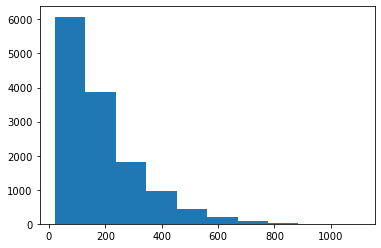

In [14]:
# 음성 Signal 길이 분포 확인

import matplotlib.pyplot as plt

plt.hist(audio_sig)

In [26]:
# 입력 길이의 통일을 위해 Mel Spectrogram과 1차 차분값에 대해 512 기준 Zero Padding 진행

import os
from tqdm import tqdm
import torch
import librosa
import torchaudio
import numpy as np
import pandas as pd

local_path = 'E:/2022년/PSAT/주제분석/'

def Mel_Extractor(file_name, length):
    signal, sr = torchaudio.load(file_name)
    mel_spec = librosa.power_to_db(
        librosa.feature.melspectrogram(y=signal[0].numpy(),
                                       sr=sr, n_mels=128, fmax=8000, fmin=100), ref=np.max)
    mel_delta = librosa.feature.delta(mel_spec)

    mel_result = np.stack((mel_spec.transpose(), mel_delta.transpose()), axis=0)
    mel_result = torch.from_numpy(mel_result)

    if mel_result.shape[1] > length:
        mel_result = mel_result[:, 0:length, :]
    else:
        mel_result = torch.cat([mel_result, torch.zeros(mel_result.shape[0], length - mel_result.shape[1], mel_result.shape[2])], dim=1)
        
    mel_result = mel_result.numpy()

    return mel_result

for i in tqdm(range(data.shape[0])):
    file_name = os.path.join(local_path, data.iloc[i, 0])
    audio_feature = Mel_Extractor(file_name=file_name, length=512)
    data.iloc[i, 0] = audio_feature


100%|████████████████████████████████████████████████████████████████████████████| 13462/13462 [03:18<00:00, 67.73it/s]


In [30]:
with gzip.open('E:/2022년/PSAT/주제분석/KEMD_ver1.pickle', 'wb') as f:
    pickle.dump(data, f)